# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
!source .venv/bin/activate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob 
import os
from datetime import datetime

In [3]:
%reload_ext jupyter_ai

In [4]:
# # NOTE: Replace 'PROVIDER_API_KEY' with the credential key's name,
# # and enter the API key when prompted by using the code shown below.

# import getpass

# # Enter your key
# token = getpass.getpass('Enter your PROVIDER API key: ')

# # Set the environment variable without displaying the full key
# os.environ['OPENAI_API_KEY'] = token

In [5]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.reset_option('^display.', silent=True)

In [6]:
# df = pd.read_excel("Online Retail.xlsx")
filepath = '/home/jefferyp/Documents/store_budget/sales/2024'
all_files = glob.glob(os.path.join(filepath, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [7]:
df.head()

,Day,Product title,Product type,Product vendor,Order ID,Billing city,Billing region,Billing postal code,Customer ID,Staff member name,...,Taxes,Total sales,Quantity ordered,Gross margin,Gross profit,Gross returns,Net returns,Total returns,Total shipping charges,Cost of goods sold
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,5.201076e+12,North Versailles,Pennsylvania,15137,6.419201e+12,NaN,...,0.00,49.00,1,0.620,30.4,0.0,0.0,0.0,0.0,18.6
1,2024-01-01,NaN,NaN,NaN,5.201076e+12,North Versailles,Pennsylvania,15137,6.419201e+12,NaN,...,0.00,3.90,0,NaN,0.0,0.0,0.0,0.0,3.9,0.0
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,5.196039e+12,NaN,NaN,NaN,6.414354e+12,Billy Kid,...,8.34,106.34,0,0.607,59.5,0.0,0.0,0.0,0.0,38.5
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,5.202638e+12,NaN,NaN,NaN,0.000000e+00,Kristi Graning,...,0.44,6.44,1,0.500,3.0,0.0,0.0,0.0,0.0,3.0
4,2024-01-02,NaN,NaN,NaN,5.202675e+12,NaN,NaN,NaN,0.000000e+00,Danielle Patton,...,0.08,0.98,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.columns = df.columns.str.title()

In [9]:
df.columns = df.columns.str.replace(" ", "", regex=True)

In [10]:
df = df.rename(columns={'ProductVariantSkuAtTimeOfSale':'SKU'})

In [11]:
df.columns

Index(['Day', 'ProductTitle', 'ProductType', 'ProductVendor', 'OrderId',
       'BillingCity', 'BillingRegion', 'BillingPostalCode', 'CustomerId',
       'StaffMemberName', 'SalesChannel', 'SKU', 'PosLocationName', 'Orders',
       'GrossSales', 'Discounts', 'Returns', 'NetSales', 'ShippingCharges',
       'Duties', 'AdditionalFees', 'Taxes', 'TotalSales', 'QuantityOrdered',
       'GrossMargin', 'GrossProfit', 'GrossReturns', 'NetReturns',
       'TotalReturns', 'TotalShippingCharges', 'CostOfGoodsSold'],
      dtype='object')

In [12]:
df['BillingRegion'] = np.where(
    (df['BillingRegion'].isna()) & (df['SalesChannel'] == 'Point of Sale'),
    'Colorado',
    df['BillingRegion']
)

In [13]:
# df1 = df.groupby('OrderId').agg({'NetSales': 'sum', 'ShippingCharges': 'sum'}).reset_index()

In [14]:
# %%ai chatgpt 
# I need to join df and df1 on OrderId

In [15]:
# df_merge = df.merge(df1, on='OrderId', how='inner')

In [16]:
df.shape

(8085, 31)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8085 entries, 0 to 8084
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Day                   8085 non-null   object 
 1   ProductTitle          7388 non-null   object 
 2   ProductType           7374 non-null   object 
 3   ProductVendor         7388 non-null   object 
 4   OrderId               8083 non-null   float64
 5   BillingCity           334 non-null    object 
 6   BillingRegion         8083 non-null   object 
 7   BillingPostalCode     334 non-null    object 
 8   CustomerId            8083 non-null   float64
 9   StaffMemberName       7754 non-null   object 
 10  SalesChannel          8083 non-null   object 
 11  SKU                   7381 non-null   object 
 12  PosLocationName       7768 non-null   object 
 13  Orders                8085 non-null   int64  
 14  GrossSales            8085 non-null   float64
 15  Discounts            

In [18]:
# Find the rows where 'InvoiceNo' contains "C" in their values
# df[df['InvoiceNo'].str.contains('C', na=False)]

In [19]:
print("Number of missing values per column:")
print(df.isnull().sum())

print("---------------------------------------------------------------------------------------------")

print("Number of unique values per row:")
print(df.nunique())

Number of missing values per column:
Day                        0
ProductTitle             697
ProductType              711
ProductVendor            697
OrderId                    2
BillingCity             7751
BillingRegion              2
BillingPostalCode       7751
CustomerId                 2
StaffMemberName          331
SalesChannel               2
SKU                      704
PosLocationName          317
Orders                     0
GrossSales                 0
Discounts                  0
Returns                    0
NetSales                   0
ShippingCharges            0
Duties                     0
AdditionalFees             0
Taxes                      0
TotalSales                 0
QuantityOrdered            0
GrossMargin              750
GrossProfit                0
GrossReturns               0
NetReturns                 0
TotalReturns               0
TotalShippingCharges       0
CostOfGoodsSold            0
dtype: int64
---------------------------------------------------

In [20]:
# Replace null CustomerIDs with "Unknown"
df['CustomerId'].fillna("Unknown", inplace=True)

# Filter rows with non-null 'Description'
df = df[df['ProductTitle'].notna()]

/tmp/ipykernel_19542/3745356074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerId'].fillna("Unknown", inplace=True)
/tmp/ipykernel_19542/3745356074.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerId'].fillna("Unknown", inplace=True)


In [21]:
columns_to_drop = ["OrderId", "SKU"]
df.drop(columns=columns_to_drop, inplace=True)

In [22]:
df.head(10)

,Day,ProductTitle,ProductType,ProductVendor,BillingCity,BillingRegion,BillingPostalCode,CustomerId,StaffMemberName,SalesChannel,...,Taxes,TotalSales,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,North Versailles,Pennsylvania,15137,6419200737339.0,NaN,Online Store,...,0.00,49.00,1,0.620,30.40,0.0,0.0,0.0,0.0,18.60
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,NaN,Colorado,NaN,6414354186299.0,Billy Kid,Point of Sale,...,8.34,106.34,0,0.607,59.50,0.0,0.0,0.0,0.0,38.50
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,NaN,Colorado,NaN,0.0,Kristi Graning,Point of Sale,...,0.44,6.44,1,0.500,3.00,0.0,0.0,0.0,0.0,3.00
5,2024-01-02,Goose & the Goat | Permanent Jewelry,Jewelry,Goose & the Goat,NaN,Colorado,NaN,6420654096443.0,Kristi Graning,Point of Sale,...,3.27,48.27,1,0.950,42.75,0.0,0.0,0.0,0.0,2.25
6,2024-01-02,See Kai Run | Dane,Kid's Footwear,See Kai Run,NaN,Colorado,NaN,6420707082299.0,Danielle Patton,Point of Sale,...,2.98,37.98,1,0.285,10.00,0.0,0.0,0.0,0.0,25.00
8,2024-01-02,Cougar | Villa,Women's Footwear,Cougar,NaN,Colorado,NaN,6414354186299.0,Billy Kid,Point of Sale,...,-15.30,-195.30,0,0.500,-90.00,-180.0,-180.0,-195.3,0.0,-90.00
9,2024-01-02,Magnetic Me | Little Duckling Bib,Kid's Apparel,Magnetic Me,Clifton Park,New York,12065,6420839563323.0,NaN,Online Store,...,0.00,12.00,1,0.500,6.00,0.0,0.0,0.0,0.0,6.00
10,2024-01-02,Nakamol | Necklace,Jewelry,Nakamol,NaN,Colorado,NaN,0.0,Danielle Patton,Point of Sale,...,7.66,97.66,2,0.666,60.00,0.0,0.0,0.0,0.0,30.00
11,2024-01-02,Boogie Toes | Wise Owl,Kid's Footwear & Accessories,Boogie Toes,NaN,Colorado,NaN,6420707082299.0,Danielle Patton,Point of Sale,...,1.20,15.20,1,0.535,7.50,0.0,0.0,0.0,0.0,6.50
13,2024-01-02,Moore Collection | Colorado Onesie,Kid's Apparel,Moore Collection,NaN,Colorado,NaN,0.0,Danielle Patton,Point of Sale,...,2.38,30.38,1,0.571,16.00,0.0,0.0,0.0,0.0,12.00


In [23]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 8084
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Day                   7205 non-null   object 
 1   ProductTitle          7205 non-null   object 
 2   ProductType           7191 non-null   object 
 3   ProductVendor         7205 non-null   object 
 4   BillingCity           198 non-null    object 
 5   BillingRegion         7205 non-null   object 
 6   BillingPostalCode     198 non-null    object 
 7   CustomerId            7205 non-null   object 
 8   StaffMemberName       7010 non-null   object 
 9   SalesChannel          7205 non-null   object 
 10  PosLocationName       7020 non-null   object 
 11  Orders                7205 non-null   int64  
 12  GrossSales            7205 non-null   float64
 13  Discounts             7205 non-null   float64
 14  Returns               7205 non-null   float64
 15  NetSales              7205

In [24]:
# Calculate the gross amount for each transaction (Quantity * UnitPrice)
df = df.assign(Gross=df['QuantityOrdered'] * df['CostOfGoodsSold'])
df

,Day,ProductTitle,ProductType,ProductVendor,BillingCity,BillingRegion,BillingPostalCode,CustomerId,StaffMemberName,SalesChannel,...,TotalSales,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold,Gross
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,North Versailles,Pennsylvania,15137,6419200737339.0,NaN,Online Store,...,49.00,1,0.620,30.40,0.0,0.0,0.0,0.0,18.60,18.60
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,NaN,Colorado,NaN,6414354186299.0,Billy Kid,Point of Sale,...,106.34,0,0.607,59.50,0.0,0.0,0.0,0.0,38.50,0.00
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,NaN,Colorado,NaN,0.0,Kristi Graning,Point of Sale,...,6.44,1,0.500,3.00,0.0,0.0,0.0,0.0,3.00,3.00
5,2024-01-02,Goose & the Goat | Permanent Jewelry,Jewelry,Goose & the Goat,NaN,Colorado,NaN,6420654096443.0,Kristi Graning,Point of Sale,...,48.27,1,0.950,42.75,0.0,0.0,0.0,0.0,2.25,2.25
6,2024-01-02,See Kai Run | Dane,Kid's Footwear,See Kai Run,NaN,Colorado,NaN,6420707082299.0,Danielle Patton,Point of Sale,...,37.98,1,0.285,10.00,0.0,0.0,0.0,0.0,25.00,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,2024-12-31,Chez Gange | Everything Is Fine Shower Steamers,Gifts,Chez Gange,NaN,Colorado,NaN,0.0,Zada Soqui,Point of Sale,...,26.82,1,0.500,12.50,0.0,0.0,0.0,0.0,12.50,12.50
8079,2024-12-31,Poppy & Pout | Lip Balm,Accessories,Poppy & Pout,NaN,Colorado,NaN,0.0,Zada Soqui,Point of Sale,...,10.67,1,0.547,5.45,0.0,0.0,0.0,0.0,4.50,4.50
8081,2024-12-31,Keep Nature Wild | Outsider Sticker,Accessories,Keep Nature Wild,Denver,Colorado,80206,7004557574203.0,NaN,Online Store,...,4.35,1,0.500,2.00,0.0,0.0,0.0,0.0,2.00,2.00
8083,2024-12-31,Dear John | Britney,Women's Clothing,Dear John,NaN,Colorado,NaN,6858968694843.0,Zada Soqui,Point of Sale,...,66.07,1,0.350,21.60,0.0,0.0,0.0,0.0,40.00,40.00


In [25]:
df.describe()

,Orders,GrossSales,Discounts,Returns,NetSales,ShippingCharges,Duties,AdditionalFees,Taxes,TotalSales,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold,Gross
count,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.0,7205.0,7205.0,7205.000000,7205.000000,7205.000000,7143.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.0,7205.000000,7205.000000
mean,0.949618,66.929285,-9.513332,-2.435836,54.980117,0.0,0.0,0.0,3.958368,58.938484,0.978071,0.450651,27.792452,-2.610680,-2.435836,-2.606719,0.0,27.080257,27.681210
std,0.218746,51.631981,18.784245,15.869629,52.314308,0.0,0.0,0.0,3.781636,56.005047,0.309155,0.575486,30.833735,16.860435,15.869629,16.984640,0.0,24.911939,23.137983
min,0.000000,0.000000,-202.800000,-248.000000,-248.000000,0.0,0.0,0.0,-17.980000,-265.980000,0.000000,-42.611000,-135.000000,-248.000000,-248.000000,-265.980000,0.0,-113.000000,-0.000000
25%,1.000000,28.000000,-10.600000,0.000000,20.900000,0.0,0.0,0.0,1.540000,22.520000,1.000000,0.447000,5.200000,0.000000,0.000000,0.000000,0.0,10.000000,9.500000
50%,1.000000,59.000000,0.000000,0.000000,47.180000,0.0,0.0,0.0,3.390000,50.600000,1.000000,0.545000,24.000000,0.000000,0.000000,0.000000,0.0,24.750000,24.000000
75%,1.000000,94.000000,0.000000,0.000000,81.780000,0.0,0.0,0.0,5.850000,87.820000,1.000000,0.588000,45.000000,0.000000,0.000000,0.000000,0.0,39.000000,39.000000
max,1.000000,378.000000,0.000000,0.000000,378.000000,0.0,0.0,0.0,26.250000,378.000000,7.000000,0.968000,228.100000,0.000000,0.000000,0.000000,0.0,149.900000,188.000000


In [26]:
# Calculate measures of central tendency
median = df.median(numeric_only=True)
median

Orders                   1.000
GrossSales              59.000
Discounts                0.000
Returns                  0.000
NetSales                47.180
ShippingCharges          0.000
Duties                   0.000
AdditionalFees           0.000
Taxes                    3.390
TotalSales              50.600
QuantityOrdered          1.000
GrossMargin              0.545
GrossProfit             24.000
GrossReturns             0.000
NetReturns               0.000
TotalReturns             0.000
TotalShippingCharges     0.000
CostOfGoodsSold         24.750
Gross                   24.000
dtype: float64

In [27]:
df['Day'] = df['Day'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [28]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
df['MonthYear'] = df['Day'].dt.to_period('M').copy()

# Print the DataFrame with the 'MonthYear' column
df

,Day,ProductTitle,ProductType,ProductVendor,BillingCity,BillingRegion,BillingPostalCode,CustomerId,StaffMemberName,SalesChannel,...,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold,Gross,MonthYear
0,2024-01-01,Echo | Touch Glove,Accessories,Echo,North Versailles,Pennsylvania,15137,6419200737339.0,NaN,Online Store,...,1,0.620,30.40,0.0,0.0,0.0,0.0,18.60,18.60,2024-01
2,2024-01-02,Volatile | Flagstaff,Women's Footwear,Very Volatile,NaN,Colorado,NaN,6414354186299.0,Billy Kid,Point of Sale,...,0,0.607,59.50,0.0,0.0,0.0,0.0,38.50,0.00,2024-01
3,2024-01-02,Chez Gagné | I'm Sorry I Called You Old,Gifts,Chez Gange,NaN,Colorado,NaN,0.0,Kristi Graning,Point of Sale,...,1,0.500,3.00,0.0,0.0,0.0,0.0,3.00,3.00,2024-01
5,2024-01-02,Goose & the Goat | Permanent Jewelry,Jewelry,Goose & the Goat,NaN,Colorado,NaN,6420654096443.0,Kristi Graning,Point of Sale,...,1,0.950,42.75,0.0,0.0,0.0,0.0,2.25,2.25,2024-01
6,2024-01-02,See Kai Run | Dane,Kid's Footwear,See Kai Run,NaN,Colorado,NaN,6420707082299.0,Danielle Patton,Point of Sale,...,1,0.285,10.00,0.0,0.0,0.0,0.0,25.00,25.00,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,2024-12-31,Chez Gange | Everything Is Fine Shower Steamers,Gifts,Chez Gange,NaN,Colorado,NaN,0.0,Zada Soqui,Point of Sale,...,1,0.500,12.50,0.0,0.0,0.0,0.0,12.50,12.50,2024-12
8079,2024-12-31,Poppy & Pout | Lip Balm,Accessories,Poppy & Pout,NaN,Colorado,NaN,0.0,Zada Soqui,Point of Sale,...,1,0.547,5.45,0.0,0.0,0.0,0.0,4.50,4.50,2024-12
8081,2024-12-31,Keep Nature Wild | Outsider Sticker,Accessories,Keep Nature Wild,Denver,Colorado,80206,7004557574203.0,NaN,Online Store,...,1,0.500,2.00,0.0,0.0,0.0,0.0,2.00,2.00,2024-12
8083,2024-12-31,Dear John | Britney,Women's Clothing,Dear John,NaN,Colorado,NaN,6858968694843.0,Zada Soqui,Point of Sale,...,1,0.350,21.60,0.0,0.0,0.0,0.0,40.00,40.00,2024-12


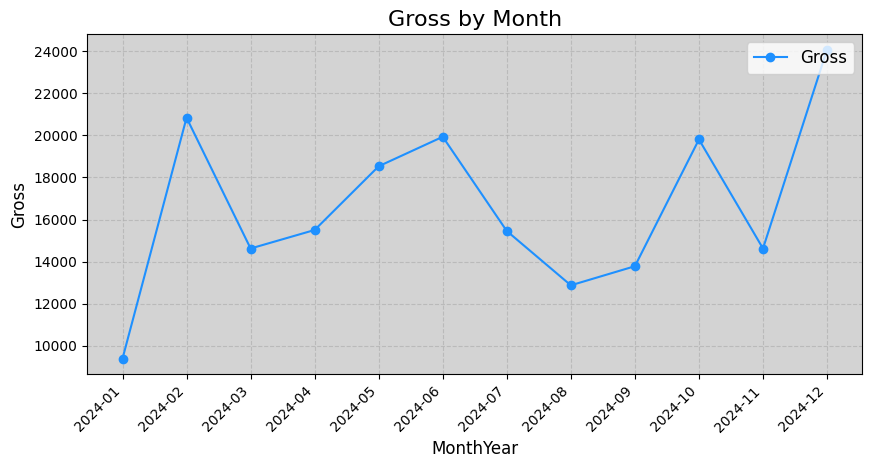

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'MonthYear' and calculate the gross purchase for each month
monthly_data = df.groupby('MonthYear')['Gross'].sum().reset_index()

# Convert the 'MonthYear' column to string format
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a colorful plot with markers and lines
plt.plot(monthly_data['MonthYear'], monthly_data['Gross'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Gross by Month', fontsize=16)
plt.xlabel('MonthYear', fontsize=12)
plt.ylabel('Gross', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Add more colors and styles if needed
# Example: ax.spines['top'].set_color('none')

plt.show()  # Show the colorful plot

In [30]:
# Create a copy of the 'Month' column
df['Month'] = df['Day'].dt.month.values

# Create a copy of the 'DayOfWeek' column
df['DayOfWeek'] = df['Day'].dt.day_name().values

# Calculate gross sales for each month
monthly_sales = df.groupby('Month')['Gross'].sum()

# Calculate gross sales for each day of the week
daily_sales = df.groupby('DayOfWeek')['Gross'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print("Busiest Month (in terms of sales):", busiest_month)
print("Busiest Day of the Week (in terms of sales):", busiest_day)

Busiest Month (in terms of sales): 12
Busiest Day of the Week (in terms of sales): Saturday


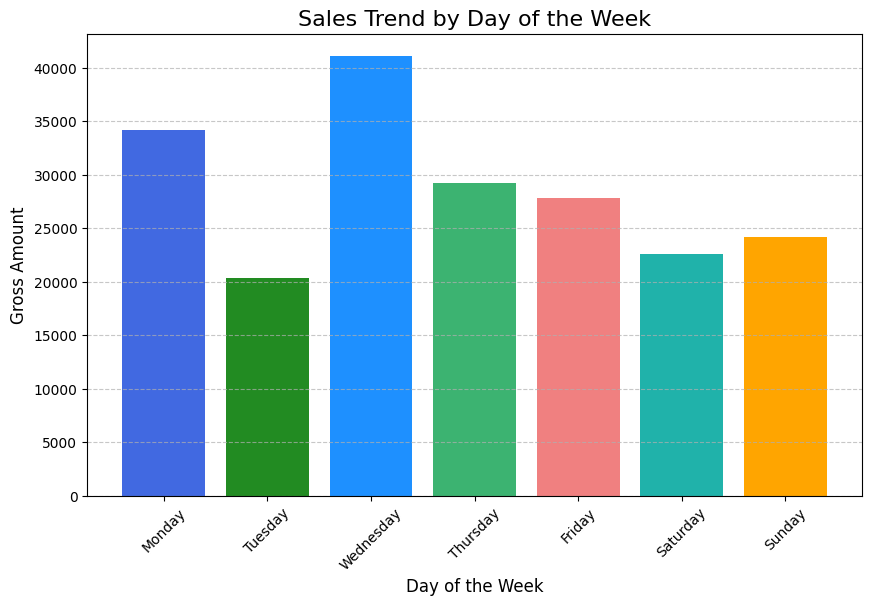

In [31]:
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Define the colors for the bars
colors = ['royalblue', 'forestgreen', 'dodgerblue', 'mediumseagreen', 'lightcoral', 'lightseagreen', 'orange']

# Create a bar plot
plt.bar(daily_sales.index, daily_sales.values, color=colors)

# Set labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)

# Set custom x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45, fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [32]:
# Calculate the gross purchase amount for each customer
customer_total_purchase = df.groupby('CustomerId')['Gross'].sum()

# Sort the customers based on the gross purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Gross']).reset_index()

# Count the total number of customers in 'df'
total_customers = df['CustomerId'].nunique()

# Print the gross number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerId'][:10]))

Among 1621 customers, the top 10 customers are: [0.0, 3092514930747.0, 5617343463483.0, 3092521877563.0, 3850354589755.0, 5298289442875.0, 6369412775995.0, 5302873653307.0, 3092532330555.0, 5793009041467.0]


In [33]:
# Find most valuable items in the list
items_total_sell = df.groupby('ProductTitle')['Gross'].sum()

# Sort the items based on the total sells in descending order
most_valuable_items = items_total_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_items_df = pd.DataFrame(most_valuable_items, columns=['Gross']).reset_index()

# Count the total number of items in 'df'
total_items = df['ProductTitle'].nunique()

# Print the total number of items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(most_valuable_items_df['ProductTitle'][:10]))

Among 1805 items, the 10 most valuable items are: ['Dear John | Fiona', 'Pistola | Lennon', 'Dear John | Audrey', 'Nakamol | Necklace', 'Dear John | Blaire', 'Latico | Aquarius', 'Mauritius | Christy', 'Native | Jefferson', 'Pistola | Alice', 'Pistola | Penny']


In [34]:
# Find the country with the most sales in the list
countrywise_sell = df.groupby('BillingRegion')['Gross'].sum()

# Sort countries based on the total sales in descending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Gross']).reset_index()

# Count the total number of unique countries in 'df'
total_countries = df['BillingRegion'].nunique()

# Print the total number of countries and the top 10 selling countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['BillingRegion'][:10]))

Among 32 countries, the top 10 selling countries are: ['Colorado', 'California', 'Texas', 'Michigan', 'Illinois', 'Alabama', 'Ohio', 'Minnesota', 'Mississippi', 'Missouri']


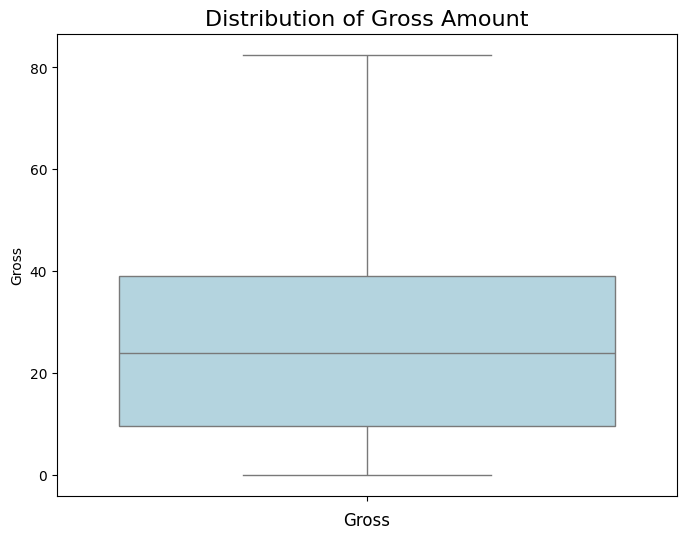

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Gross' column
sns.boxplot(data=df, y='Gross', color='lightblue', showfliers=False)  # showfliers=False to remove outliers

# Add a title and labels
plt.title('Distribution of Gross Amount', fontsize=16)
plt.xlabel('Gross', fontsize=12)

# Show the plot
plt.show()

In [36]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(df['Gross'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = df[outlier_mask]

outliers.shape

(121, 33)

In [37]:
# Remove outliers from the main dataset
without_outliers_online_retail = df[~outlier_mask]

# Statistical Summary of data without outliers
summary_without_outliers = without_outliers_online_retail.describe()
summary_without_outliers

,Day,Orders,GrossSales,Discounts,Returns,NetSales,ShippingCharges,Duties,AdditionalFees,Taxes,...,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold,Gross,Month
count,7084,7084.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.0,7084.0,7084.0,7084.000000,...,7084.000000,7022.000000,7084.000000,7084.000000,7084.000000,7084.000000,7084.0,7084.000000,7084.000000,7084.000000
mean,2024-06-28 03:56:36.725014016,0.948758,63.587451,-8.996419,-2.477442,52.113590,0.0,0.0,0.0,3.753141,...,0.976143,0.451472,26.421605,-2.655272,-2.477442,-2.651244,0.0,25.582743,26.109997,6.420807
min,2024-01-01 00:00:00,0.000000,0.000000,-139.000000,-248.000000,-248.000000,0.0,0.0,0.0,-17.980000,...,0.000000,-42.611000,-135.000000,-248.000000,-248.000000,-265.980000,0.0,-113.000000,-0.000000,1.000000
25%,2024-03-22 00:00:00,1.000000,26.000000,-10.200000,0.000000,20.000000,0.0,0.0,0.0,1.500000,...,1.000000,0.448000,5.000000,0.000000,0.000000,0.000000,0.0,9.500000,9.500000,3.000000
50%,2024-06-20 00:00:00,1.000000,58.000000,0.000000,0.000000,45.560000,0.0,0.0,0.0,3.270000,...,1.000000,0.545000,23.000000,0.000000,0.000000,0.000000,0.0,24.000000,24.000000,6.000000
75%,2024-10-02 00:00:00,1.000000,90.000000,0.000000,0.000000,79.000000,0.0,0.0,0.0,5.730000,...,1.000000,0.588750,44.000000,0.000000,0.000000,0.000000,0.0,38.500000,38.000000,10.000000
max,2024-12-31 00:00:00,1.000000,298.000000,0.000000,0.000000,298.000000,0.0,0.0,0.0,21.610000,...,7.000000,0.968000,178.100000,0.000000,0.000000,0.000000,0.0,119.900000,95.000000,12.000000
std,NaN,0.220507,44.701312,17.132661,16.001386,47.046722,0.0,0.0,0.0,3.400905,...,0.306402,0.577867,28.085365,17.000357,16.001386,17.125654,0.0,22.158973,19.813749,3.507733


In [38]:
df.describe() # Statistical Summary of data with outliers

,Day,Orders,GrossSales,Discounts,Returns,NetSales,ShippingCharges,Duties,AdditionalFees,Taxes,...,QuantityOrdered,GrossMargin,GrossProfit,GrossReturns,NetReturns,TotalReturns,TotalShippingCharges,CostOfGoodsSold,Gross,Month
count,7205,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.0,7205.0,7205.0,7205.000000,...,7205.000000,7143.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.0,7205.000000,7205.000000,7205.000000
mean,2024-06-29 01:39:19.861207296,0.949618,66.929285,-9.513332,-2.435836,54.980117,0.0,0.0,0.0,3.958368,...,0.978071,0.450651,27.792452,-2.610680,-2.435836,-2.606719,0.0,27.080257,27.681210,6.450382
min,2024-01-01 00:00:00,0.000000,0.000000,-202.800000,-248.000000,-248.000000,0.0,0.0,0.0,-17.980000,...,0.000000,-42.611000,-135.000000,-248.000000,-248.000000,-265.980000,0.0,-113.000000,-0.000000,1.000000
25%,2024-03-23 00:00:00,1.000000,28.000000,-10.600000,0.000000,20.900000,0.0,0.0,0.0,1.540000,...,1.000000,0.447000,5.200000,0.000000,0.000000,0.000000,0.0,10.000000,9.500000,3.000000
50%,2024-06-20 00:00:00,1.000000,59.000000,0.000000,0.000000,47.180000,0.0,0.0,0.0,3.390000,...,1.000000,0.545000,24.000000,0.000000,0.000000,0.000000,0.0,24.750000,24.000000,6.000000
75%,2024-10-02 00:00:00,1.000000,94.000000,0.000000,0.000000,81.780000,0.0,0.0,0.0,5.850000,...,1.000000,0.588000,45.000000,0.000000,0.000000,0.000000,0.0,39.000000,39.000000,10.000000
max,2024-12-31 00:00:00,1.000000,378.000000,0.000000,0.000000,378.000000,0.0,0.0,0.0,26.250000,...,7.000000,0.968000,228.100000,0.000000,0.000000,0.000000,0.0,149.900000,188.000000,12.000000
std,NaN,0.218746,51.631981,18.784245,15.869629,52.314308,0.0,0.0,0.0,3.781636,...,0.309155,0.575486,30.833735,16.860435,15.869629,16.984640,0.0,24.911939,23.137983,3.517378


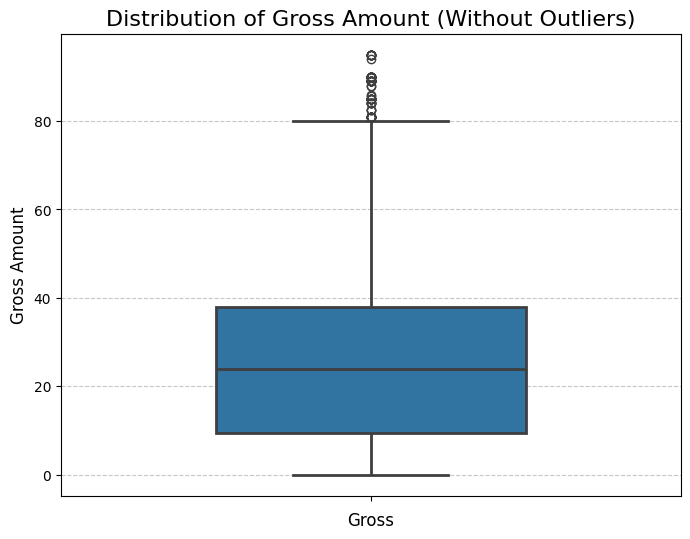

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Customize the color palette
# colors = sns.color_palette("Paired")  # You can choose a different palette

# Create a box plot for the 'Gross' column without outliers
sns.boxplot(data=without_outliers_online_retail, y='Gross', width=0.5, linewidth=2)

# Add a title and labels
plt.title('Distribution of Gross Amount (Without Outliers)', fontsize=16)
plt.xlabel('Gross', fontsize=12)
plt.ylabel('Gross Amount', fontsize=12)

# Add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()